In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = {
    'ID': range(1, 21),
    'Nombre': ['Ana', 'Luis', 'Carlos', 'María', 'Elena', 'Jorge', 'Sofía', 'Andrés', 'Laura', 'Pedro',
               'Paula', 'Diego', 'Carmen', 'Marta', None, 'Pablo', 'Lucía', 'Manuel', 'Carla', 'David'],
    'Edad': [23, 35, 30, 22, 28, 25, 34, 45, 29, 41, 38, 25, 33, 27, 32, 36, 32, 39, 31, 40],
    'Salario': [5000, 6000, np.nan, 58000, 49000, 62000, 72000, 61000, 52000, 670000,
                55000, 53000, np.nan, 69000, 64000, 71000, 68000, 73000, np.nan, 66000],
    'Fecha_Ingreso': ['2020-01-10', '2019-06-15', '2020-03-25', None, '2018-07-30', '2017-09-14',
                      '2016-11-22', '2021-04-01', '2015-05-19', '2014-08-25', '2013-12-30', '2012-02-11',
                      '2011-10-17', None, '2020-09-09', '2018-04-05', '2019-11-22', '2010-07-27', '2020-05-13', '2017-01-29']
}
df = pd.DataFrame(data)
df.fillna({'Salario': df['Salario'].mean()}, inplace=True)

display(df)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23,5000.000000,2020-01-10
1,2,Luis,35,6000.000000,2019-06-15
2,3,Carlos,30,91411.764706,2020-03-25
3,4,María,22,58000.000000,None
4,5,Elena,28,49000.000000,2018-07-30
5,6,Jorge,25,62000.000000,2017-09-14
6,7,Sofía,34,72000.000000,2016-11-22
7,8,Andrés,45,61000.000000,2021-04-01
8,9,Laura,29,52000.000000,2015-05-19
9,10,Pedro,41,670000.000000,2014-08-25


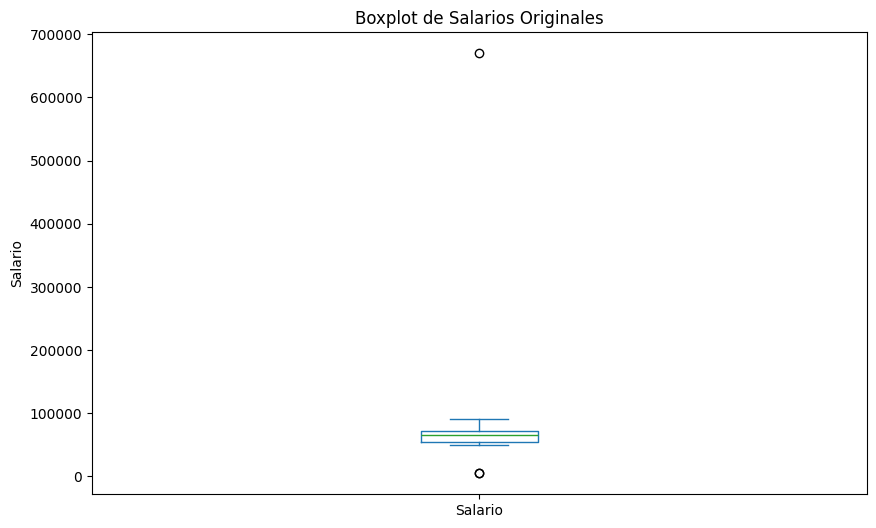

In [2]:
plt.figure(figsize=(10, 6))
df['Salario'].plot(kind='box', title='Boxplot de Salarios Originales')
plt.ylabel('Salario')
plt.show()

In [3]:
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salario'] < lower_bound) | (df['Salario'] > upper_bound)]
display(outliers)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23,5000.0,2020-01-10
1,2,Luis,35,6000.0,2019-06-15
9,10,Pedro,41,670000.0,2014-08-25


In [4]:
df['Salario_Capped'] = np.where(
    (df['Salario'] < lower_bound) | (df['Salario'] > upper_bound),
    df['Salario'].median(),
    df['Salario'])

display(df[['Salario', 'Salario_Capped']])

,Salario,Salario_Capped
0,5000.000000,65000.000000
1,6000.000000,65000.000000
2,91411.764706,91411.764706
3,58000.000000,58000.000000
4,49000.000000,49000.000000
5,62000.000000,62000.000000
6,72000.000000,72000.000000
7,61000.000000,61000.000000
8,52000.000000,52000.000000
9,670000.000000,65000.000000


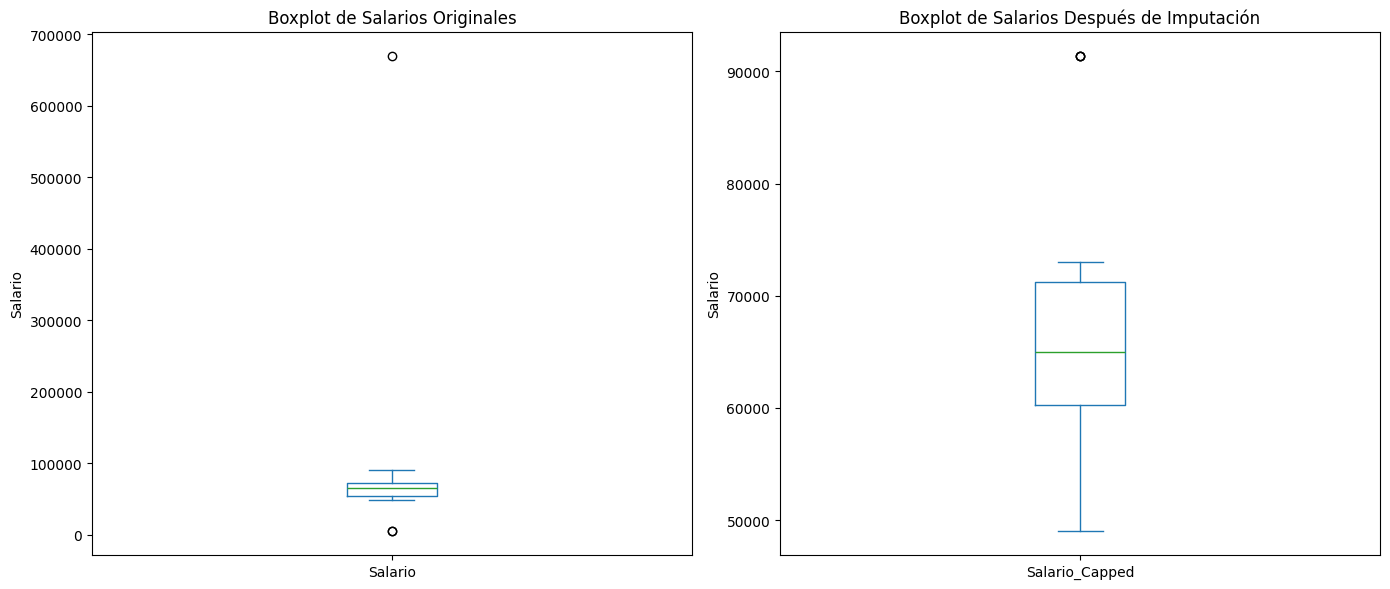

In [5]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df['Salario'].plot(kind='box', title='Boxplot de Salarios Originales')
plt.ylabel('Salario')
plt.subplot(1, 2, 2)
df['Salario_Capped'].plot(kind='box', title='Boxplot de Salarios Después de Imputación')
plt.ylabel('Salario')
plt.tight_layout()
plt.show()

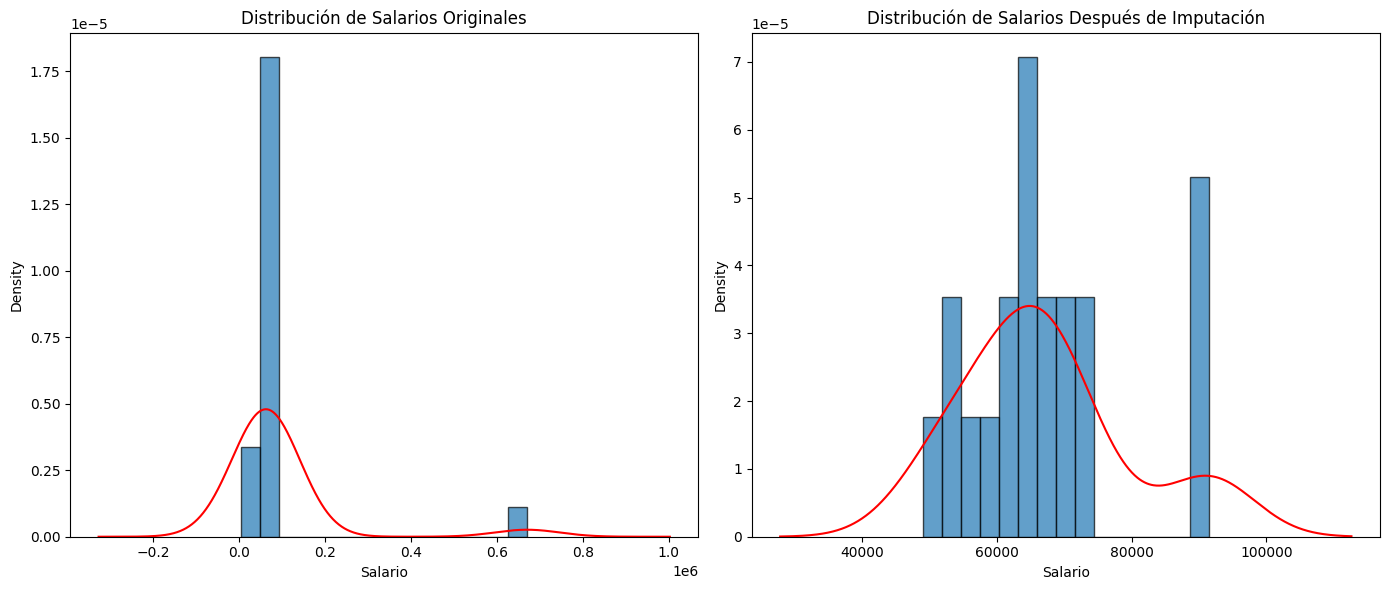

In [6]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df['Salario'].plot(kind='hist', bins=15, edgecolor='black', density=True, alpha=0.7, title='Distribución de Salarios Originales')
df['Salario'].plot(kind='kde', color='red')
plt.xlabel('Salario')

plt.subplot(1, 2, 2)
df['Salario_Capped'].plot(kind='hist', bins=15, edgecolor='black', density=True, alpha=0.7, title='Distribución de Salarios Después de Imputación')
df['Salario_Capped'].plot(kind='kde', color='red')
plt.xlabel('Salario')

plt.tight_layout()
plt.show()

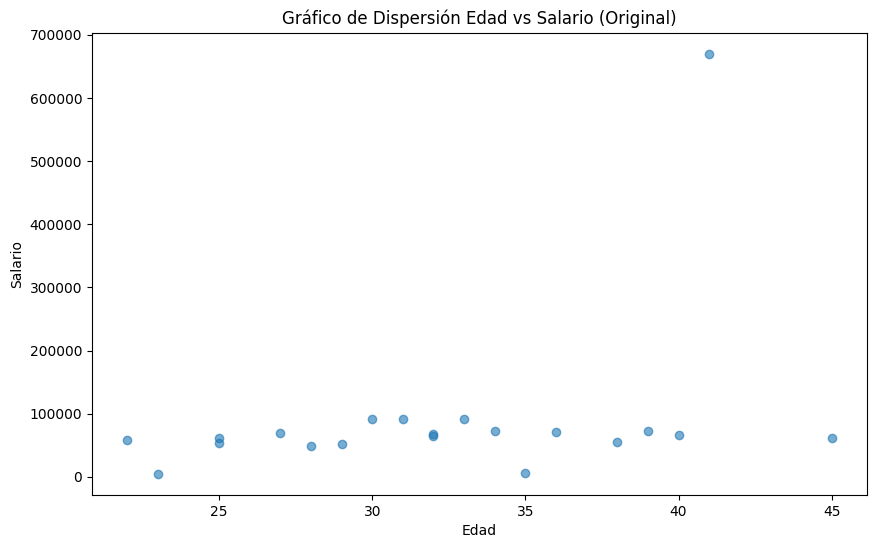

In [7]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Edad'], df['Salario'], alpha=0.6)
plt.title('Gráfico de Dispersión Edad vs Salario (Original)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

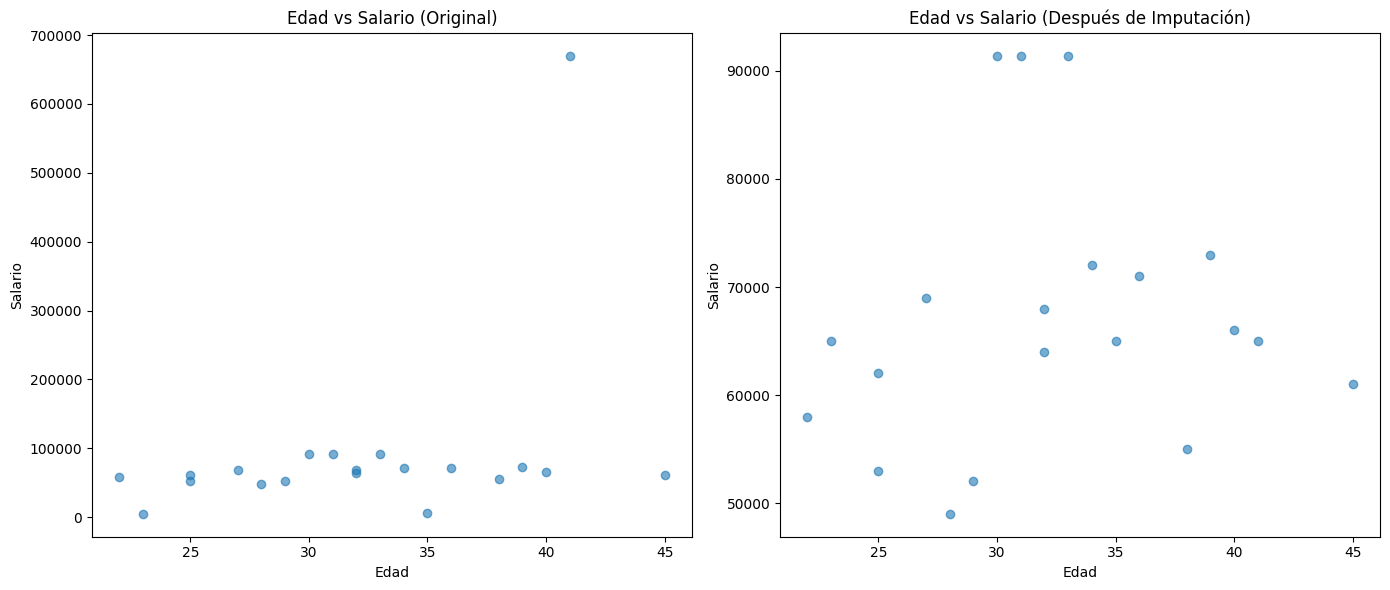

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['Edad'], df['Salario'], alpha=0.6)
plt.title('Edad vs Salario (Original)')
plt.xlabel('Edad')
plt.ylabel('Salario')

plt.subplot(1, 2, 2)
plt.scatter(df['Edad'], df['Salario_Capped'], alpha=0.6)
plt.title('Edad vs Salario (Después de Imputación)')
plt.xlabel('Edad')
plt.ylabel('Salario')

plt.tight_layout()
plt.show()